#Intro to Keras and tensorflow

Let's build a model to diagnose the diabetes disease based on generic information on the patient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Access the dataset and store it in a container

In [2]:
#access the dataset and store it in a panda dataframe
df = pd.read_csv('data/diabetes.csv')

#reshuffle the df rows
df = df.sample(frac = 1)

In [3]:
#print the first 5 rows
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
685,2,129,74,26,205,33.2,0.591,25,0
660,10,162,84,0,0,27.7,0.182,54,0
316,3,99,80,11,64,19.3,0.284,30,0
8,2,197,70,45,543,30.5,0.158,53,1
299,8,112,72,0,0,23.6,0.840,58,0


In [4]:
#print the number of rows and columns
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#We notice that certain field contain null values, which is not expected in some case

Let's try to remove those lines

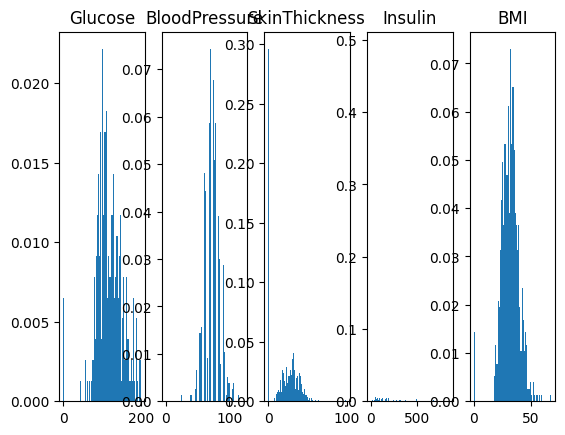

In [6]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

fig, axes = plt.subplots(1, 5)

for ii in range(5):
  axes[ii].hist(df[zero_fields[ii]], bins=np.arange(min(df[zero_fields[ii]]), max(df[zero_fields[ii]]) + 1, 1), density=True)
  axes[ii].set_title(zero_fields[ii])

In [7]:
# lets fix the 0-entry for a field in the dataset with its mean value
def impute_zero_field(data, field):
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(data.loc[ data[field] == 0, field])   # num of 0-entries
    data.loc[ data[field] == 0, field] = avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))


# Fix it for Train dataset
for field in zero_fields:
    impute_zero_field(df, field)


Field: Glucose; fixed 5 entries with value: 121.687
Field: BloodPressure; fixed 35 entries with value: 72.405
Field: SkinThickness; fixed 227 entries with value: 29.153
Field: Insulin; fixed 374 entries with value: 155.548
Field: BMI; fixed 11 entries with value: 32.457


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/3463594012.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[ data[field] == 0, field] = avg
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/3463594012.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[ data[field] == 0, field] = avg
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/3463594012.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.153419593345657' has dtype incompatible with int64, please explici

In [8]:
df.shape

(768, 9)

##Manipulate the dataset and create the train and target variables

(array([  4.,  19.,  87., 149., 161., 130.,  88.,  54.,  44.,  32.]),
 array([0.22110553, 0.29899497, 0.37688442, 0.45477387, 0.53266332,
        0.61055276, 0.68844221, 0.76633166, 0.84422111, 0.92211055,
        1.        ]),
 <BarContainer object of 10 artists>)

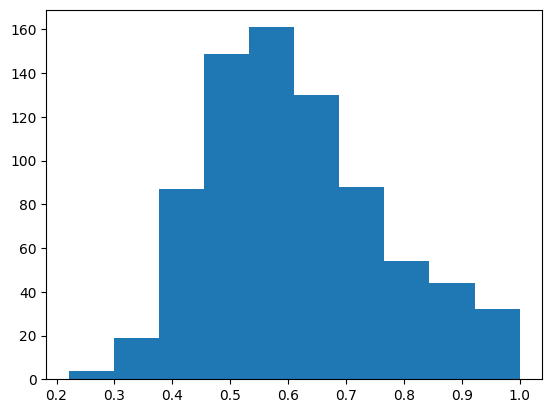

In [9]:
#define the target variable
target_column = ['Outcome']

#create the list of features, after excluding the target variable
predictors = list(set(list(df.columns))-set(target_column))

#normalize the features between 0 and 1 to reduce the influence of the predictor's units and magnitude on the modelling process.
df[predictors] = df[predictors]/df[predictors].max()


plt.hist(df['Glucose'])


In [10]:
X = df[predictors].values
Y = df[target_column].values

#compute the fraction to be used for training and testing (keep 20% for further testing)
fraction = int(X.size/8*0.90)

X_train = X[:fraction,:]
X_test  = X[fraction:,:]

Y_train = Y[:fraction,:]
Y_test  = Y[fraction:,:]

#print(X_train.size, X_test.size)
#print(X_train,Y_train)

In [11]:
#import the needed libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras import initializers
from keras.utils import to_categorical

##Build the model

In [14]:
model = Sequential() # feed forward neural network
model.add(Input(shape=(8,))) # input nodes with shape (8,)
model.add(Dense(12, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros')) # hidden layer 1, kernel initializer tells us what is the initial starting point (initial random weights in this case)
model.add(Dropout(0.5)) # 50% of the connections will be dropped during training at random
model.add(Dense(8, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros')) # hidden layer 2
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal', bias_initializer='zeros')) # output layer, just 1 neuron, because it responds with yes/no

# Compile the model
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)

opt = keras.optimizers.Adam(learning_rate=0.001)  #Adam optimizer, with the learning rate chosen
model.compile(optimizer='adam', # algorithm used during minimization, optimized gradient descent seen in other courses
              loss='binary_crossentropy', 
              metrics=['accuracy']) # target is to go as close as possible to the right answer

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

108 params because it's 12 times 8 plus 12 biases  
104 because 12 times 8 plus 8 biases

In [16]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split=0.2) # does the validation split in place

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6349 - loss: 0.6914 - val_accuracy: 0.7050 - val_loss: 0.6799
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.6237 - loss: 0.6838 - val_accuracy: 0.7050 - val_loss: 0.6646
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.6379 - loss: 0.6739 - val_accuracy: 0.7050 - val_loss: 0.6504
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6430 - loss: 0.6564 - val_accuracy: 0.7050 - val_loss: 0.6399
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6535 - loss: 0.6635 - val_accuracy: 0.7050 - val_loss: 0.6349
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6372 - loss: 0.6614 - val_accuracy: 0.7050 - val_loss: 0.6321
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6409 - loss: 0.6627 - val_accuracy: 0.7050 - val_loss: 0.6291
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6664 - loss: 0.6

##Evaluate the model

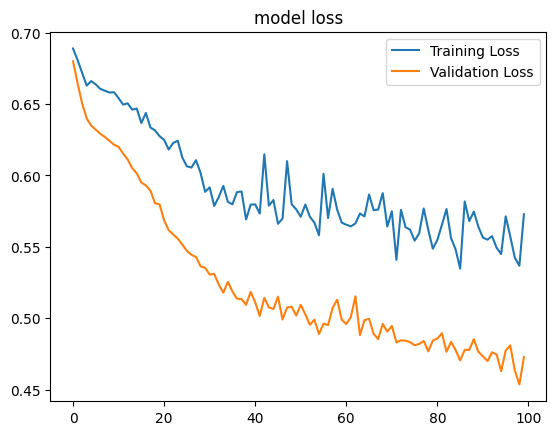

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('model loss')
plt.legend()
plt.show()

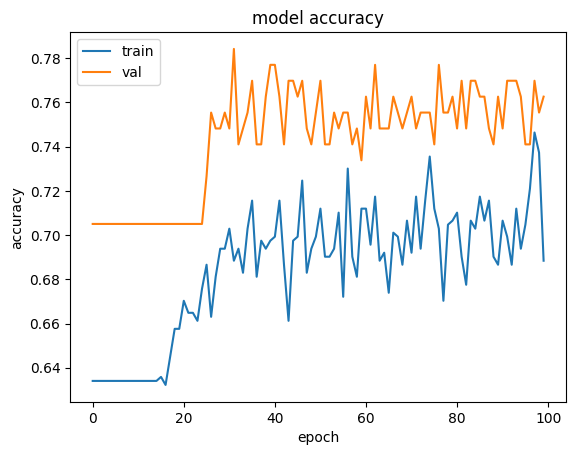

In [19]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/1545301050.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(prediction_test, label='test dataset', alpha=.8, edgecolor='red', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/1545301050.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(prediction_train, label='train dataset', alpha=.8, edgecolor='yellow', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)


<function matplotlib.pyplot.show(close=None, block=None)>

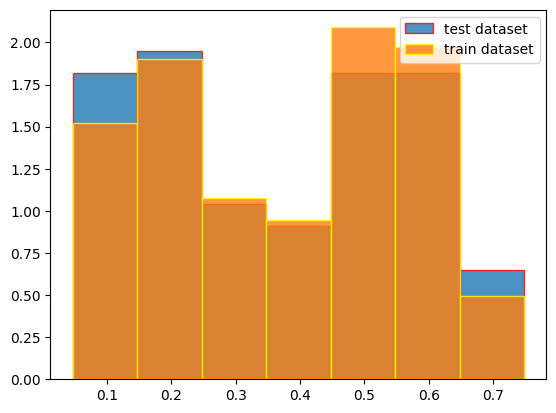

In [20]:
#predict the outcome on the test sample and plot the score
prediction_test = (model.predict(X_test))
plt.hist(prediction_test, label='test dataset', alpha=.8, edgecolor='red', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)

#predict the outcome on the test sample and plot the score
prediction_train = (model.predict(X_train))
plt.hist(prediction_train, label='train dataset', alpha=.8, edgecolor='yellow', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)

plt.legend()
plt.show

In [21]:
print(prediction_test.max())

0.677433


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/2191416197.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(prediction_test, label='test dataset', alpha=.8, edgecolor='red', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_75199/2191416197.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(prediction_train, label='train dataset', alpha=.7, edgecolor='yellow', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)


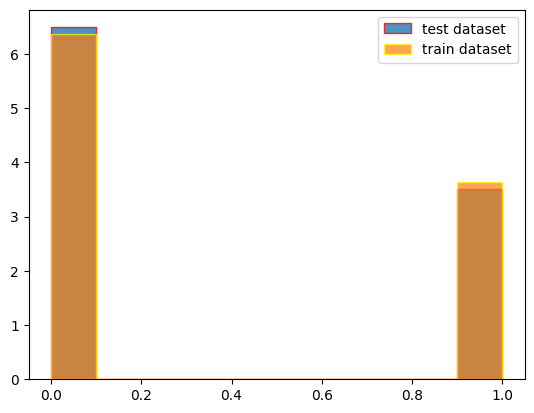

In [22]:
#cast the score to a bool value
prediction_test = np.round(prediction_test) #cut the score in half
plt.hist(prediction_test, label='test dataset', alpha=.8, edgecolor='red', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)

prediction_train = np.round(prediction_train) #cut the score in half
plt.hist(prediction_train, label='train dataset', alpha=.7, edgecolor='yellow', bins=np.arange(min(prediction_test), max(prediction_test) + 0.1, 0.1), density=True)

plt.legend()
plt.show()

In [23]:
diff_test = abs(prediction_test - Y_test)
print('Accuracy on test data: {}'.format(1 - np.sum(diff_test)/diff_test.size))

diff_train = abs(prediction_train - Y_train)
print('Accuracy on train data: {}'.format(1 - np.sum(diff_train)/diff_train.size))

Accuracy on test data: 0.7662337662337663
Accuracy on train data: 0.7713458755426917
